### Problem Statement :

   - **Predict whether a patient has diabetes or not , based on some diagnostic measurements**

![](https://cdn.diabetesselfmanagement.com/2019/05/Turn-Into-1000x622.jpg)

### Import all the dependencies

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
# Files in the current directory
os.listdir()

['.ipynb_checkpoints',
 'diabetes.csv',
 'Diabetes.ipynb',
 'Diabetic-Supplies.png',
 'Major Project.docx',
 'overfitting.png']

### Load the dataset

In [3]:
diabetes_df = pd.read_csv('diabetes.csv')
df = diabetes_df.copy()

In [4]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Concise summary of all the columns
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes_df.shape

(768, 9)

In [7]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
input_cols = diabetes_df.columns[:-1]
target_col = 'Outcome'

print("Input columns : ", list(input_cols))
print("Target column : ", target_col)

Input columns :  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Target column :  Outcome


### Exploratory data analysis [EDA]

In [9]:
# Import all the dependencies
import seaborn as sns
import matplotlib
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)

- **Correlation matrix and Heatmap**

In [11]:
correlation_matrix = diabetes_df.corr()

<AxesSubplot:>

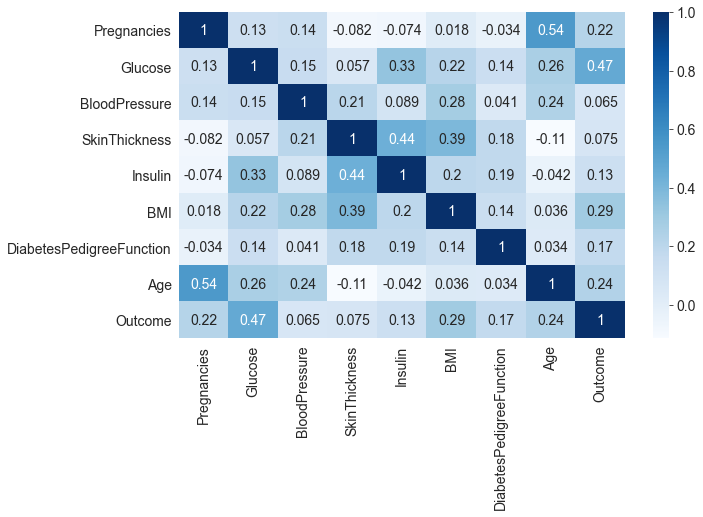

In [12]:
sns.heatmap(correlation_matrix, annot = True, cmap = "Blues")

> From the heatmap it is observerd that `Age` and `Pregnancies`, `Glucose` and `Outcome` are positively correlated.

In [13]:
hig_correlation = correlation_matrix[correlation_matrix.iloc[:] > 0.4]

In [14]:
hig_correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.544341,NaN
Glucose,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.466581
BloodPressure,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
SkinThickness,NaN,NaN,NaN,1.000000,0.436783,NaN,NaN,NaN,NaN
Insulin,NaN,NaN,NaN,0.436783,1.000000,NaN,NaN,NaN,NaN
BMI,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
DiabetesPedigreeFunction,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Age,0.544341,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
Outcome,NaN,0.466581,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


### Scatter plot between high correlated features

In [15]:
def sns_scatter(column1, column2):
    plt.figure(figsize = (14, 6))
    plt.title("Scatter plot  {} vs {}".format(column1, column2))
    sns.regplot(data = df, x = column1, y = column2)

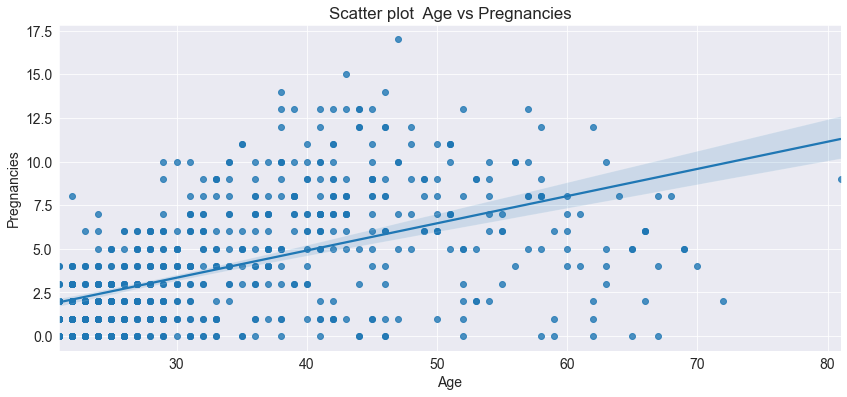

In [16]:
sns_scatter('Age', 'Pregnancies')

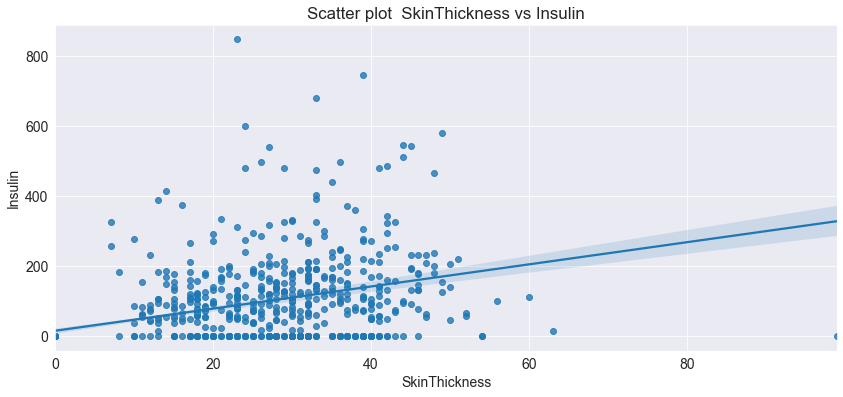

In [17]:
sns_scatter('SkinThickness', 'Insulin')

- FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

### Plots of different columns

In [18]:
def sns_histogram(column):
    plt.figure(figsize = (14, 6))
    plt.title("Distribution of {}".format(column))
    sns.histplot(data = df, x = column, bins = 30)

In [19]:
def sns_violin(column):
    plt.figure(figsize = (7,6))
    plt.title('Violin Plot of Outcome vs {}'.format(column))
    sns.violinplot(x = df['Outcome'], y = df[column])

In [20]:
def px_histogram(column):
    plt.figure(figsize = (14, 6))
    fig = px.histogram(df, x = column, title = column, nbins = 30)
    fig.update_layout(bargap=0.1)
    fig.show()

In [21]:
def px_violin(column):
    fig = px.violin(df, x = 'Outcome', y = column, box = True)
    fig.show()

In [22]:
def hist_violin(column):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(column)

    # Histogram plot
    sns.histplot(data = df, ax=axes[0], x= column, bins = 30)
    axes[0].set_title("Histogram plot")

    # Violin plot
    sns.violinplot(ax=axes[1], x = df['Outcome'], y = df[column])
    axes[1].set_title("Violin plot")

- **Pregnancies**

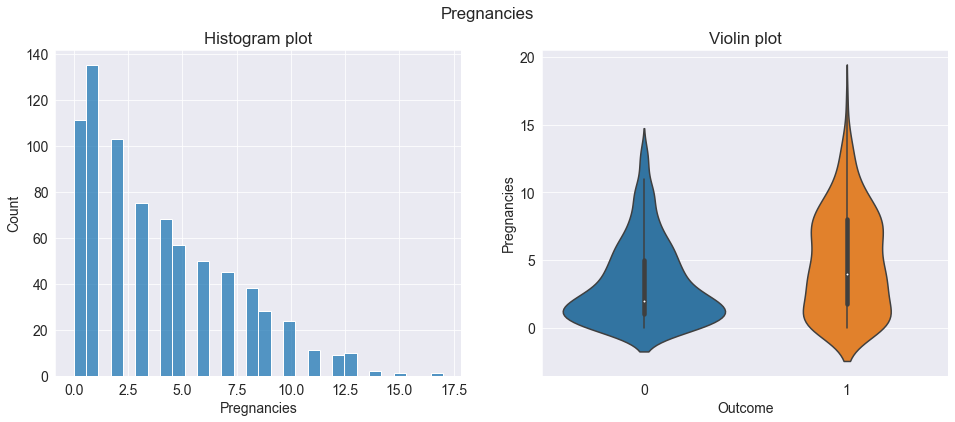

In [23]:
hist_violin('Pregnancies')

> **As the Preganancies increases the count of patient decreases and max count is 135 with 1 pregnancy.**<br>**For outcome 0 average Pregnancies are 2 but for outcome 1 it's 4.**

- **Glucose**

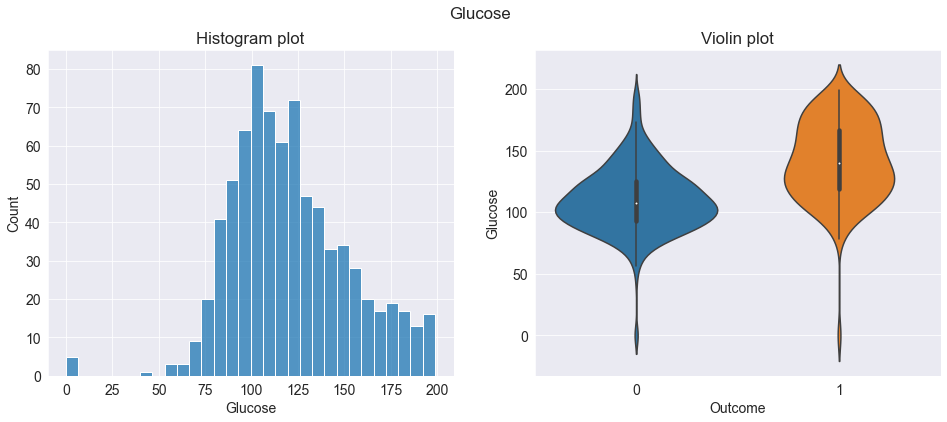

In [24]:
hist_violin('Glucose')

> **As we can see the most of the data has Glucose levels from 90-130.**<br>**For Outcome 0 the median value of Glucose is 107 where as average Glucose level is 140 for Outcome 1.**

- **BloodPressure**

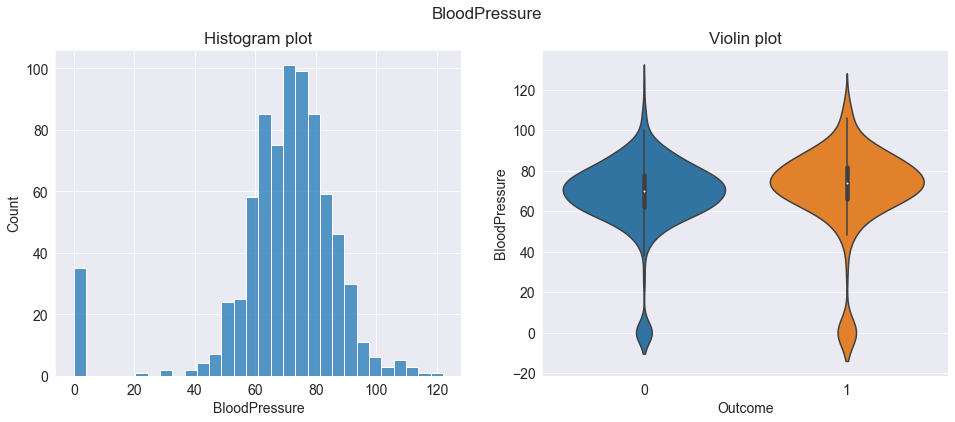

In [25]:
hist_violin('BloodPressure')

> **Here BP 0 and count is 35 , 153 people with BP around 70-74 and the remaining data seems to be normal.**<br>**For Outcome 0 the median value of BloodPressure is 70 and is 74 for Outcome 1.**

- **SkinThickness**

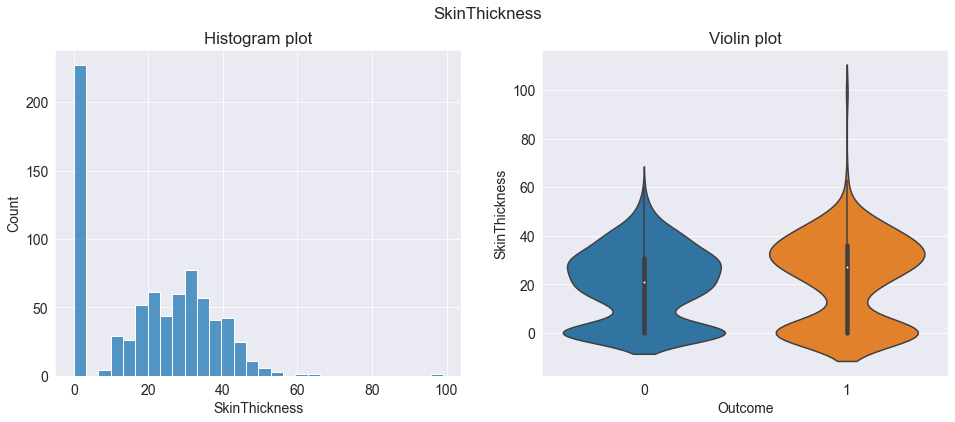

In [26]:
hist_violin('SkinThickness')

> **Patients with SkinThickness 0 are more than any other patients.**<br>**Patient with Outcome 0 has SkinThickness 21 and for Outcome 1 it's 27.**

- **Insulin**

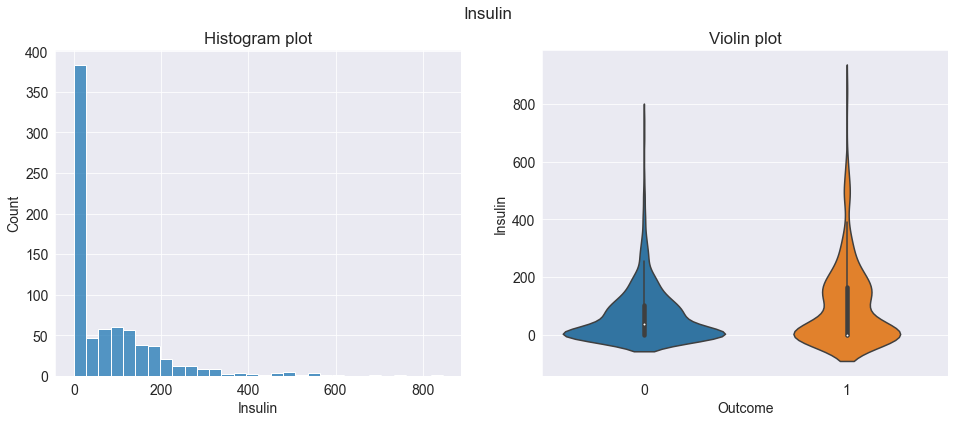

In [27]:
hist_violin('Insulin')

> **Patients with Insulin 0 are more than any other.**<br>**Patient with outcome 1 has an avg value of Insulin 0 and 39 for patient with Outcome 0**

- **BMI**

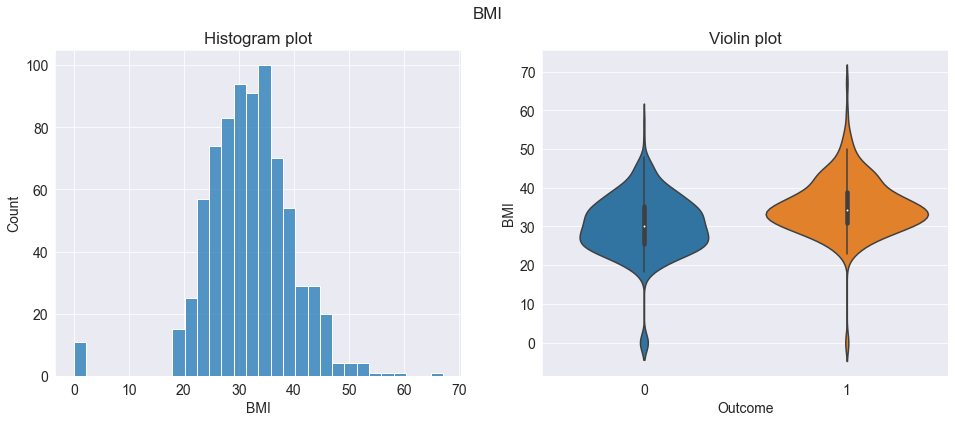

In [28]:
hist_violin('BMI')

> **From the plot most of the data is has BMI in range 25-40.**<br>**And for patient with Outcome 0 has an avg BMI value 30 and 34 for patient with Outcome 1.**

- **DiabetesPedigreeFunction**

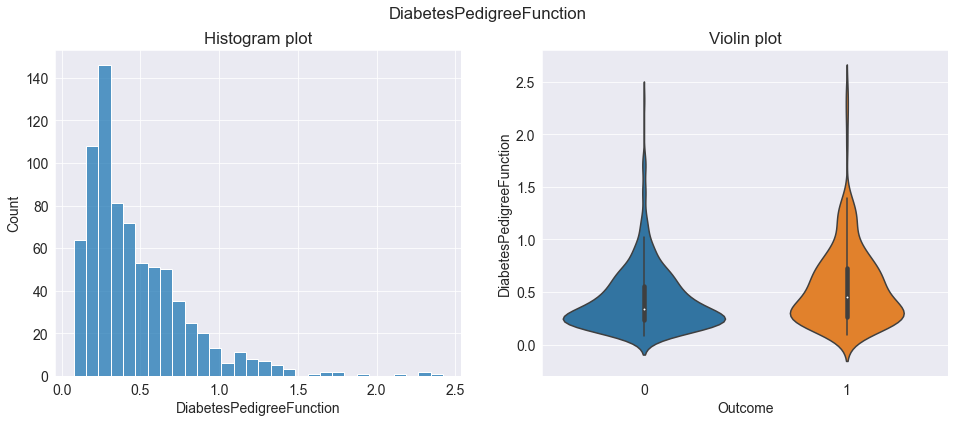

In [29]:
hist_violin('DiabetesPedigreeFunction')

> **Patients with DiabetesPedigreeFuntion value from 0.2-0.3 are high amoung others.**<br>**From the above plot on an average value of 0.336 for DiabetesPedigreeFunction the outcome is non-diabetic patient and 0.449 for outcome Diabetic patient**

- **Age**

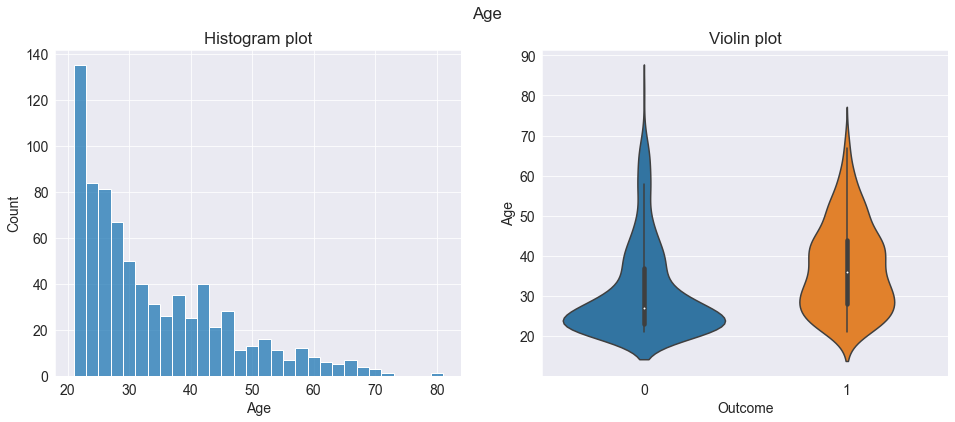

In [30]:
hist_violin('Age')

> **From the above plot most of the patients are aged below 50.**<br>**The median value of Age for Outcome 0 is 27 and is 36 for Outcome 1**

- **Pairplot of dataset**

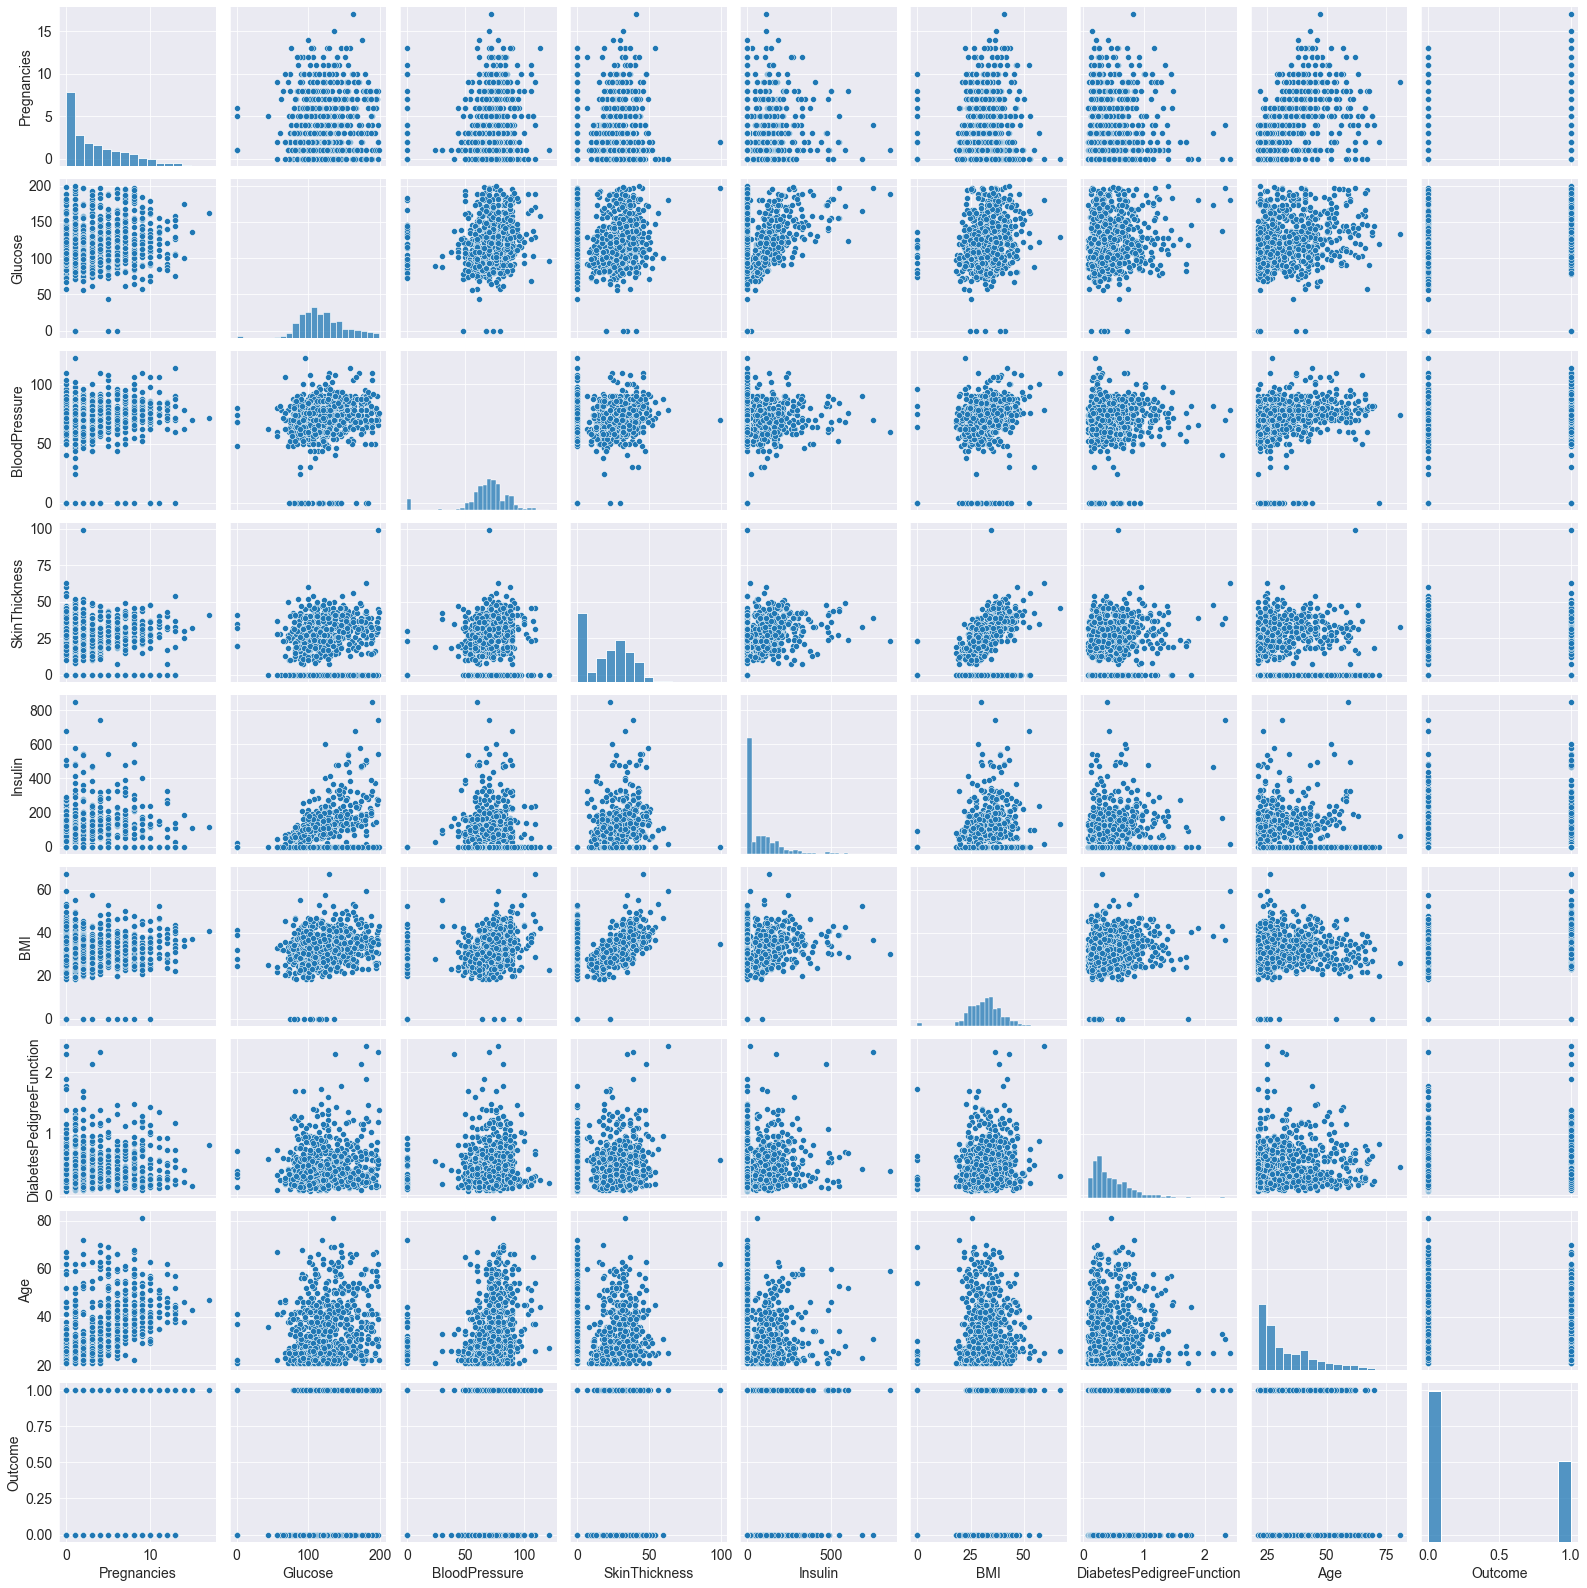

In [31]:
sns.pairplot(diabetes_df)

In [32]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

- **Statistical analysis of numeric columns**

In [33]:
diabetes_df[input_cols].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


###  Imputing missing values

- **Checking for null values**

In [34]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

> **As there are no missing values in our dataset so no need of any imputation.**

### Encoding the categorical colummns

In [35]:
diabetes_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

> **As we can see all the columns are of numeric data type and no categorical columns are present, so no need of encoding also.**

### Scaling numeric features

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(diabetes_df[input_cols])

In [37]:
diabetes_df[input_cols] = scaler.transform(diabetes_df[input_cols])

### Train and test split

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree, export_text

In [39]:
train_x, test_x, train_y, test_y = train_test_split(diabetes_df[input_cols],
                                                    diabetes_df[target_col],
                                                    test_size = 0.2,
                                                    random_state = 42)

## Building Classification models

# DecisionTreeClassifier

In [40]:
dtc_model = DecisionTreeClassifier(random_state = 42)
dtc_model.fit(train_x, train_y)
dtc_train_preds = dtc_model.predict(train_x)
dtc_test_preds = dtc_model.predict(test_x)
print("DTC Train accuracy score : ", round(accuracy_score(dtc_train_preds, train_y)*100, 2))
print("DTC Test accuracy score : ", round(accuracy_score(dtc_test_preds, test_y)*100, 2))

DTC Train accuracy score :  100.0
DTC Test accuracy score :  74.68


In [41]:
print(dtc_test_preds)

[1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1
 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0
 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0]


- **Classes** of the model

In [42]:
dtc_model.classes_

array([0, 1], dtype=int64)

> **Class `0` - Patient don't have diabetes**<br>**Class `1` - Patient has diabetes**

- **Feature Importance** of each and every feature.

In [43]:
dtc_feature_importances = pd.DataFrame({'Features' : test_x.columns,
                                    'Importance' : dtc_model.feature_importances_
                                   }).sort_values(by = 'Importance', ascending=False)
dtc_feature_importances.head()

,Features,Importance
1,Glucose,0.314225
5,BMI,0.170700
2,BloodPressure,0.147679
7,Age,0.099215
6,DiabetesPedigreeFunction,0.083282


<AxesSubplot:title={'center':'Decision Tree Feature Importance'}, xlabel='Importance', ylabel='Features'>

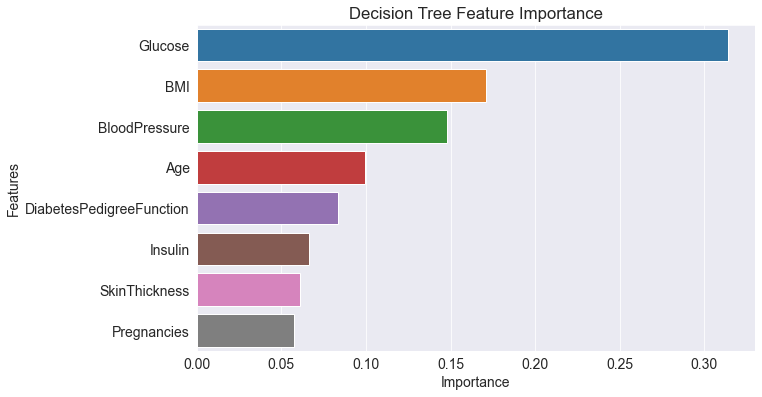

In [44]:
plt.title('Decision Tree Feature Importance')
sns.barplot(data = dtc_feature_importances, y='Features', x='Importance')

- From the above plot it's observed that **Glucose, BMI** and **Age** have great impact on our classification model than any other features.

- **Visual representation of decision tree**

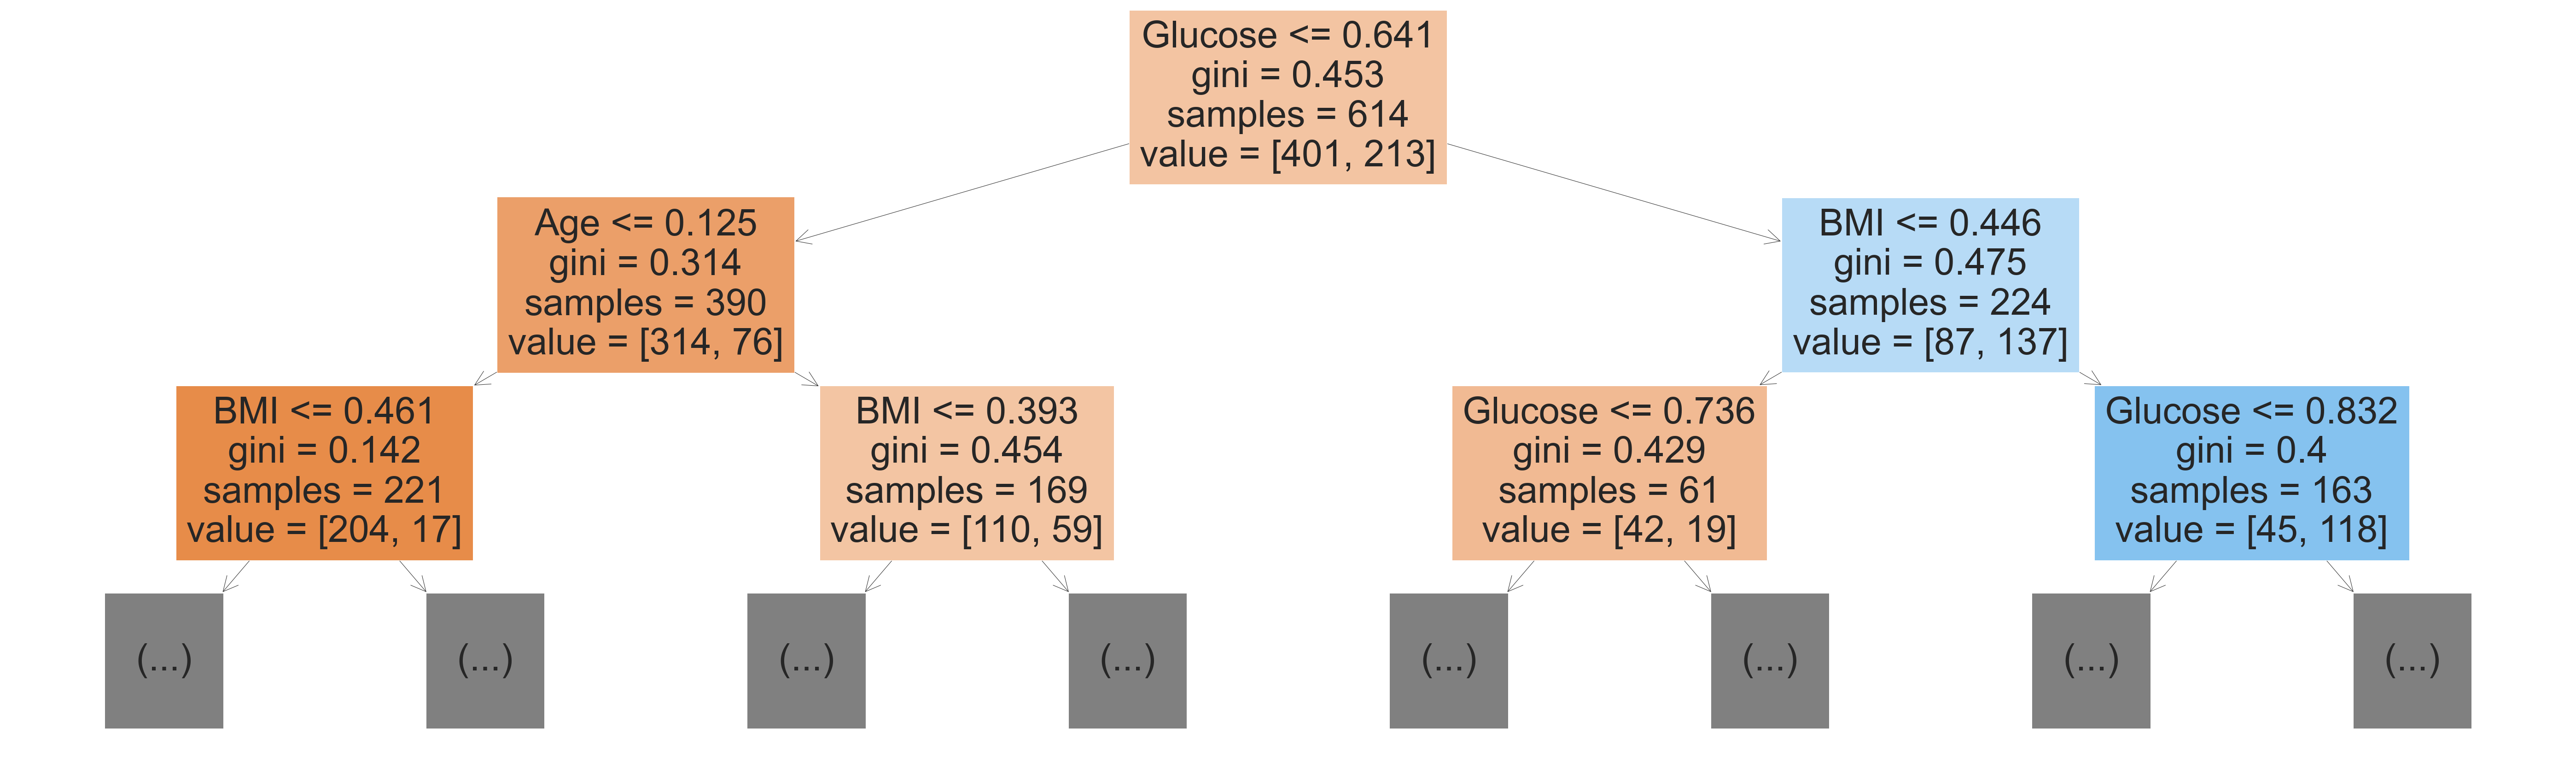

In [45]:
fig = plt.figure(figsize=(100,30))
dt = plot_tree(dtc_model, feature_names=train_x.columns, max_depth=2 ,filled = True)

- **Saving the decision tree**

In [46]:
fig.savefig('Decision_tree.png')
print('Downloaded Successsfully.')

Downloaded Successsfully.


- **Visualising our decision tree textually**

In [47]:
text_representation = export_text(dtc_model)
print(text_representation)

|--- feature_1 <= 0.64
|   |--- feature_7 <= 0.13
|   |   |--- feature_5 <= 0.46
|   |   |   |--- feature_6 <= 0.25
|   |   |   |   |--- class: 0
|   |   |   |--- feature_6 >  0.25
|   |   |   |   |--- feature_6 <= 0.26
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_6 >  0.26
|   |   |   |   |   |--- class: 0
|   |   |--- feature_5 >  0.46
|   |   |   |--- feature_2 <= 0.30
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  0.30
|   |   |   |   |--- feature_6 <= 0.18
|   |   |   |   |   |--- feature_3 <= 0.09
|   |   |   |   |   |   |--- feature_1 <= 0.55
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_1 >  0.55
|   |   |   |   |   |   |   |--- feature_1 <= 0.62
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_1 >  0.62
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_3 >  0.09
|   |   |   |   |   |   |--- feature_5 <= 0.46
|   |   |   |   |   |   |   |--- class: 

# RandomForestClassifier 

In [48]:
rfc_model = RandomForestClassifier(random_state = 42)
rfc_model.fit(train_x, train_y)
rfc_train_preds = rfc_model.predict(train_x)
rfc_test_preds = rfc_model.predict(test_x)
print("RFC Train accuracy score : ",round(accuracy_score(rfc_train_preds, train_y)*100, 2))
print("RFC Test accuracy score : ",round(accuracy_score(rfc_test_preds, test_y)*100, 2))

RFC Train accuracy score :  100.0
RFC Test accuracy score :  72.08


In [49]:
print(rfc_test_preds)

[0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0
 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


In [50]:
rfc_feature_importances = pd.DataFrame({'Features' : test_x.columns,
                                    'Importance' : rfc_model.feature_importances_
                                   }).sort_values(by = 'Importance', ascending=False)
rfc_feature_importances.head()

,Features,Importance
1,Glucose,0.258864
5,BMI,0.169984
7,Age,0.140931
6,DiabetesPedigreeFunction,0.123768
2,BloodPressure,0.088134


<AxesSubplot:title={'center':'Decision Tree Feature Importance'}, xlabel='Importance', ylabel='Features'>

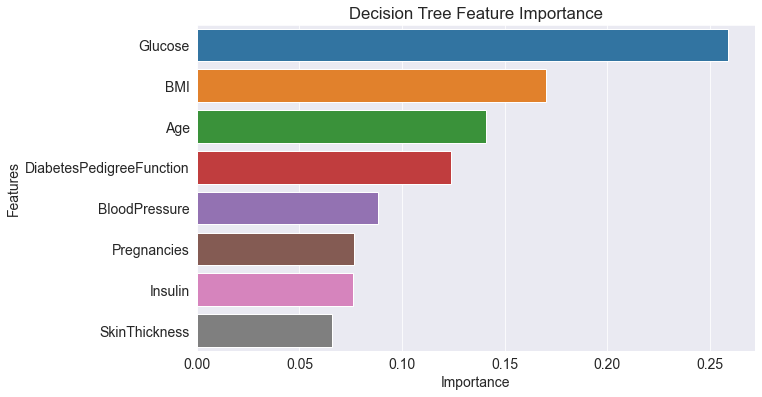

In [51]:
plt.title('Decision Tree Feature Importance')
sns.barplot(data = rfc_feature_importances, y='Features', x='Importance')

- From the above plot it's observed that **Glucose, BMI** and **Age** have great impact on our classification model than any other features.

## Hyperparameter tuning

- **To increase the test accuracy and to avoid overfitting, we tune the hyperparameters.**

In [52]:
dtc_kwargs = {'max_depth' : 5}
final_dtc_model = DecisionTreeClassifier(random_state = 42, **dtc_kwargs)
final_dtc_model.fit(train_x, train_y)
final_dtc_train_preds = final_dtc_model.predict(train_x)
final_dtc_test_preds = final_dtc_model.predict(test_x)
print("DTC final Train accuracy : ", round(accuracy_score(final_dtc_train_preds, train_y)*100, 2))
print("DTC final Test accuracy  : ", round(accuracy_score(final_dtc_test_preds, test_y)*100, 2))

DTC final Train accuracy :  84.2
DTC final Test accuracy  :  79.22


- In the previous model *Train Accuracy*  is 100 and after `hyperparameter tuning` its been decreased to 84.2
- In the previous model *Test Accuracy* is : 74.68 now after `hyperparameter tuning` it has been increased to 79.22.
- It means our model is performing better on test data than the previous model.

In [53]:
rfc_kwargs = {'max_depth' : 2}
final_rfc_model = RandomForestClassifier(random_state = 42, **rfc_kwargs)
final_rfc_model.fit(train_x, train_y)
final_rfc_train_preds = final_rfc_model.predict(train_x)
final_rfc_test_preds = final_rfc_model.predict(test_x)
print("RFC final Train accuracy: ", round(accuracy_score(final_rfc_train_preds, train_y)*100, 2))
print("RFC final Test accuracy : ",round(accuracy_score(final_rfc_test_preds, test_y)*100, 2))

RFC final Train accuracy:  77.69
RFC final Test accuracy :  79.22


- In the previous model *Train Accuracy*  is 100 and after `hyperparameter tuning` its been decreased to 77.69
- In the previous model *Test Accuracy* is : 72.08 now after `hyperparameter tuning` it has been increased to 79.22.
- It means our model is performing better on test data than the previous model.

### Predicting for single input

In [54]:
df.tail(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [55]:
def predict_inputs(model, inputs):
    df = pd.DataFrame([inputs])
    df[input_cols] = scaler.transform(df[input_cols])
    x_input = df[input_cols]
    pred = model.predict(x_input)
    prob = model.predict_proba(x_input)[0][list(model.classes_).index(pred)]
    return (pred, prob)

In [56]:
while(True):
    option = int(input("1. Predict \n2. Quit\nChoose one option : "))
    if option == 1 :
        inputs = {'Pregnancies' : int(input('Enter number of pregnancies : ')),
                  'Glucose' : int(input('Enetr Glucose level : ')),
                  'BloodPressure' : int(input('Enter BloodPressure : ')),
                  'SkinThickness' : int(input('Enter skin thickness : ')),
                  'Insulin' : int(input('Enter Insulin level : ')),
                  'BMI' : float(input('Enter BMI : ')),
                  'DiabetesPedigreeFunction' : float(input('Enter DiabetesPedigreeFunction : ')),
                  'Age' : int(input('Enter your age : '))}
        
        Prediction, Probability = predict_inputs(rfc_model, inputs)
        if Prediction : 
            print("\nYes, the patient has diabetes.")
        else :
            print("\nNo, the patient don't have diabetes.")
    else:
        print("\nSorry, you choose to quit.")
        break

1. Predict 
2. Quit
Choose one option : 2

Sorry, you choose to quit.
